In [181]:
import numpy as np
import os
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib_scalebar.scalebar import ScaleBar
import scipy.ndimage as ndi
from skimage.filters import rank 
from scipy.signal import butter, lfilter
import scipy.misc as misc
from skimage import exposure
from PIL import Image
import colorcet as cc
from scipy.misc import toimage
import matplotlib.colors as clr
import pandas as pd
import seaborn as sns
from scipy import stats
import cv2
from pyspark import SparkContext, SparkConf
import skimage
from pathlib import Path

def mean2(x):
    y = np.sum(x) / np.size(x);
    return y
def corr2(a,b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / np.sqrt((a*a).sum() * (b*b).sum());
    return r
from copy import deepcopy
from skimage.filters import threshold_otsu,threshold_li
import glob
from IPython.display import clear_output
import scipy.io as spio
import pims
from skimage.measure import label, regionprops
from skimage.color import label2rgb
import scipy

import warnings
warnings.filterwarnings('ignore')

In [182]:
expdir='/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Culture_ClickChemistry/'
protein="TNR" #TNR,Agg,WFA,HABP

In [183]:
results = {"filename":[],
          "exp condition":[],
          "mean correlation":[],
          "correlation":[]}
           
path = os.path.dirname(expdir)  
outputFolder = os.path.dirname(expdir + "/new/")
filelist = []
for root, _, filenames in os.walk(path):
     for filename in filenames:
         filelist.append(os.path.join(root, filename))      
for i in range(0,len(filelist)):
    if "_analyse" in str(filelist[i]):
        if "normal_corrs_all" in str(filelist[i]):
            #if ("neg" in str(filelist[i]))==False:
                if ("averageprojection" in str(filelist[i]))==False:
                    if filelist[i].endswith(".txt"): 
                        
                    
                        if str(filelist[i][:-12]) not in str(results["filename"]):
                            results["filename"].append(filelist[i])
                            if "maxproj" in str(filelist[i]):
                                results["exp condition"].append(filelist[i].split('/')[-3])
                            else:
                                results["exp condition"].append(filelist[i].split('/')[-2])
                            results["mean correlation"].append(np.loadtxt(filelist[i]).mean())
                            results["correlation"].append(np.loadtxt(filelist[i]))
                            print(filelist[i])

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Culture_ClickChemistry/20190612_funcatdbco_TNR_analyse/withgreenchannel/aha/TIF_imp/normal_corrs_all.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Culture_ClickChemistry/20190612_funcatdbco_TNR_analyse/withgreenchannel/vacht_negcontrol/TIF_imp/normal_corrs_all.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Culture_ClickChemistry/20190723_FUNCAN_STED_analyse/10_gal4hrs/TIF_imp/normal_corrs_all.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Culture_ClickChemistry/20190723_FUNCAN_STED_analyse/11_glcgal4hrs/TIF_imp/normal_corrs_all.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Culture_ClickChemistry/20190723_FUNCAN_STED_analyse/12_glcgal4hrs/TIF_imp/normal_corrs_all.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Culture_ClickChemistry/20190723_FUNCAN_STED_analyse/1_glc24hrs/TIF_imp/normal_corrs_all.txt
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Culture_ClickChemistry/20190723_FUNCAN_STED_analyse/2_glc24hrs/TIF_imp/normal_corrs_all.

In [184]:
path = os.path.dirname(expdir)  
outputFolder = os.path.dirname(expdir + "/new/")
filelist = []
for root, _, filenames in os.walk(path):
     for filename in filenames:
         filelist.append(os.path.join(root, filename))      
for i in range(0,len(filelist)):
    if "corrs_rand" in str(filelist[i]):
      #  if "normal_corrs_all" in str(filelist[i]):
       #     if ("posthoc" in str(filelist[i]))==False:
        #        if ("averageprojection" in str(filelist[i]))==False:
                    if filelist[i].endswith(".txt"): 
                        if str(filelist[i][:-12]) not in str(results["filename"]):
                            results["filename"].append(filelist[i])
                            if "maxproj" in str(filelist[i]):
                                results["exp condition"].append(filelist[i].split('/')[-3])
                            else:
                                results["exp condition"].append(filelist[i].split('/')[-2])
                            results["mean correlation"].append(np.loadtxt(filelist[i]).mean())
                            results["correlation"].append(np.loadtxt(filelist[i]))

## Plots

In [185]:
newdf=pd.DataFrame(results)

In [186]:
len(newdf)

54

In [187]:
newdf['Protein']='None'

newdf.loc[newdf['filename'].str.contains('glc4hrs'), 'Protein'] = 'GlcNAz 4h'
newdf.loc[newdf['filename'].str.contains('gal4hrs'), 'Protein'] = 'GalNAz 4h'
newdf.loc[newdf['filename'].str.contains('glc24hrs'), 'Protein'] = 'GlcNAz 24h'
newdf.loc[newdf['filename'].str.contains('gal24hrs'), 'Protein'] = 'GalNAz 24h'
newdf.loc[newdf['filename'].str.contains('glcgal24hrs'), 'Protein'] = 'Glc+Gal 24h'


newdf.loc[newdf['filename'].str.contains('glc24hrs_blk24hr'), 'Protein'] = 'Glc 24h, blk24'
newdf.loc[newdf['filename'].str.contains('gal24hrs_blk24hr'), 'Protein'] = 'Gal 24h, blk24'
newdf.loc[newdf['filename'].str.contains('glcgal24hrs_blk24hr'), 'Protein'] = 'Glc+Gal 24h, blk24'
newdf.loc[newdf['filename'].str.contains('glcgal4hrs'), 'Protein'] = 'Glc+Gal 4h'

newdf.loc[newdf['filename'].str.contains('glcgal4hrs'), 'Protein'] = 'Glc+Gal 4h'
newdf.loc[(newdf['filename'].str.contains('0502'))&(newdf['filename'].str.contains('blocked')), 'Protein'] = 'AHA'
newdf.loc[(newdf['filename'].str.contains('0522'))&(newdf['filename'].str.contains('acth')), 'Protein'] = 'Neg ctrl AchT'
newdf.loc[(newdf['filename'].str.contains('0522'))&(newdf['filename'].str.contains('635')), 'Protein'] = 'Pos ctrl nb635'
newdf.loc[(newdf['filename'].str.contains('0522'))&(newdf['filename'].str.contains('_analyse/funcat')), 'Protein'] = 'AHA'
newdf.loc[(newdf['filename'].str.contains('0605'))&(newdf['filename'].str.contains('withgreenchannel/funcat')), 'Protein'] = 'AHA'
newdf.loc[(newdf['filename'].str.contains('0605'))&(newdf['filename'].str.contains('635')), 'Protein'] = 'Pos ctrl nb635'
newdf.loc[(newdf['filename'].str.contains('0605'))&(newdf['filename'].str.contains('acht')), 'Protein'] = 'Neg ctrl AchT'
newdf.loc[(newdf['filename'].str.contains('0612'))&(newdf['filename'].str.contains('acht')), 'Protein'] = 'Neg ctrl AchT'
newdf.loc[(newdf['filename'].str.contains('0612'))&(newdf['filename'].str.contains('635')), 'Protein'] = 'Pos ctrl nb635'
newdf.loc[(newdf['filename'].str.contains('0612'))&(newdf['filename'].str.contains('aha')), 'Protein'] = 'AHA'
newdf.loc[(newdf['filename'].str.contains('0612'))&(newdf['filename'].str.contains('aha')), 'Protein'] = 'AHA'
newdf.loc[(newdf['filename'].str.contains('aha')), 'Protein'] = 'AHA'
newdf.loc[(newdf['filename'].str.contains('vacht')), 'Protein'] = 'Neg ctrl AchT'



newdf.loc[newdf['filename'].str.contains('positivectrl'), 'Protein'] = 'Pos ctrl 2 secondaries'


In [188]:
newdf["Protein"].unique()

array(['AHA', 'Neg ctrl AchT', 'GalNAz 4h', 'Glc+Gal 4h', 'GlcNAz 24h',
       'GalNAz 24h', 'Glc+Gal 24h', 'GlcNAz 4h', 'Pos ctrl 2 secondaries',
       'Glc+Gal 24h, blk24', 'Gal 24h, blk24', 'Glc 24h, blk24'],
      dtype=object)

In [189]:
newdf["exp name"]='None'
newdf.loc[newdf['filename'].str.contains('0502'),'exp name']='0502'
newdf.loc[newdf['filename'].str.contains('0522'),'exp name']='0522'
newdf.loc[newdf['filename'].str.contains('0605'),'exp name']='0605'
newdf.loc[newdf['filename'].str.contains('0612'),'exp name']='0612'
newdf.loc[newdf['filename'].str.contains('0627'),'exp name']='0627'
newdf.loc[newdf['filename'].str.contains('0703'),'exp name']='0703'
newdf.loc[newdf['filename'].str.contains('0716'),'exp name']='0716'
newdf.loc[newdf['filename'].str.contains('0723'),'exp name']='0723'
newdf.loc[newdf['filename'].str.contains('0801'),'exp name']='0801'
newdf.loc[newdf['filename'].str.contains('0813'),'exp name']='0813'

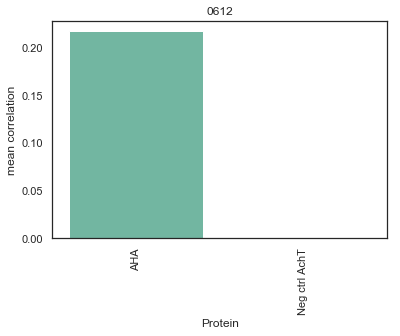

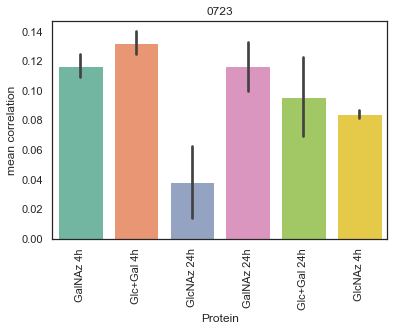

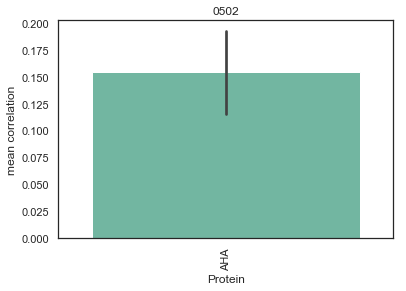

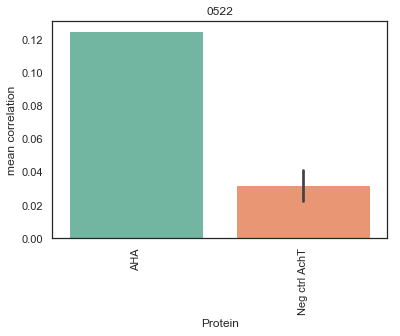

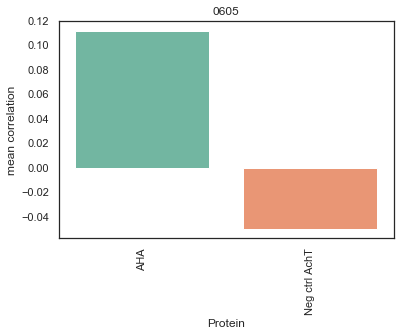

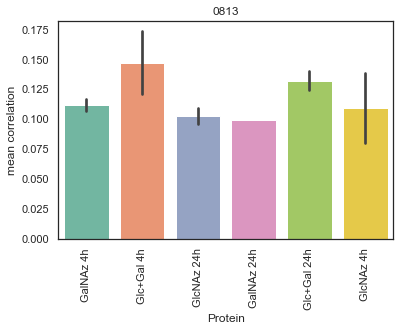

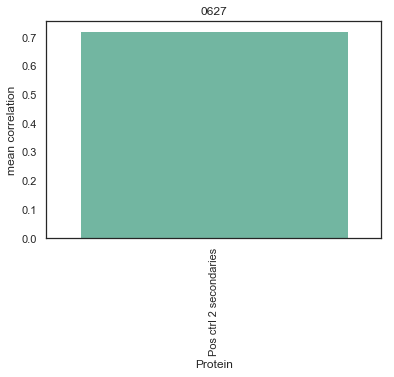

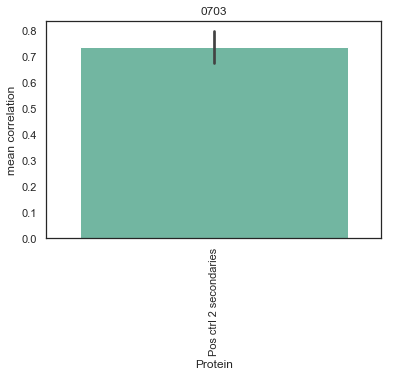

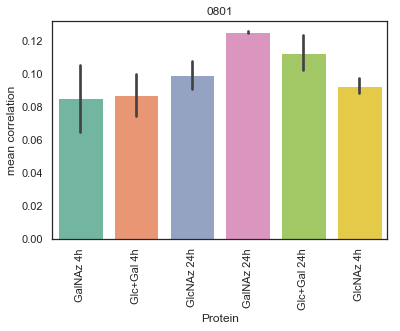

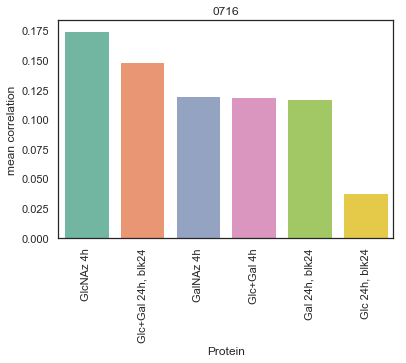

In [190]:
var="mean correlation"
for exp in newdf["exp name"].unique():
    
    dfexp=newdf[newdf["exp name"]==exp]
    dfexp=dfexp.reset_index()
    plt.figure()
    sns.barplot(x="Protein",y=var,data=dfexp)
    plt.xticks(rotation=90)
    plt.title(exp)

In [199]:
dfnew2=newdf#[newdf["exp name"]!='0716']
dfnew2=dfnew2.reset_index()

(0, 0.25)

<Figure size 432x288 with 0 Axes>

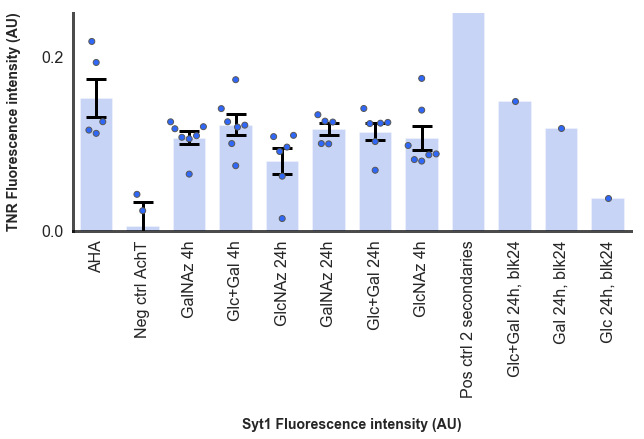

In [200]:
sns.set(font_scale=2.5)
sns.set(font="Arial")
sns.set_style("white")
sns.despine()
sns.set_palette("Set2")

var="mean correlation"
fig=plt.figure(figsize=(10,4))
#order=['2hrs','4hrs','12hrs','No Blocking']
#palette ={"No Blocking":"gray","2hrs":"magenta","4hrs":"magenta","12hrs":"magenta"}

g=sns.swarmplot(x="Protein",y=var,
                data=dfnew2,size=6,color="#2F67F8",linewidth=1)

g=sns.barplot(x="Protein",y=var,
                data=dfnew2,alpha=0.3,ci=None,color="#2F67F8")

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        # we change the bar width
        patch.set_width(new_value)
        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
change_width(g, .7)

plt.errorbar(x=np.arange(0,len(dfnew2["Protein"].unique())),
             y=[dfnew2[dfnew2["Protein"]==protein][var].mean() for protein in dfnew2["Protein"].unique()],
             yerr=[dfnew2[dfnew2["Protein"]==protein][var].sem() for protein in dfnew2["Protein"].unique()],
             xerr=None,ecolor='black',fmt='none',capsize=10,linewidth=3,capthick=3)


#scale_y=1/100
#ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
#g.yaxis.set_major_formatter(ticks_y)
g.set_ylabel('TNR Fluorescence intensity (AU)',size=14,weight ='bold',labelpad=20)
g.set_xlabel('Syt1 Fluorescence intensity (AU)',size=14,weight ='bold',labelpad=20)
plt.xticks(g.get_xticks(),size=16,rotation=45)
plt.yticks(g.get_yticks(),size=16)
g.grid(False)

sns.despine(ax=g,right=True,top=True)
for axis in ['top','bottom','left','right']:
  g.spines[axis].set_linewidth(3)
  g.spines[axis].set_color('black')
  g.spines[axis].set_alpha(.7)



plt.xticks(rotation=90)
plt.ylim([0,0.25])

## add expname

In [201]:
newdf["expname"]='none'
newdf.loc[newdf['filename'].str.contains('0502'), 'expname'] = '0502_funcat'
newdf.loc[newdf['filename'].str.contains('0522'), 'expname'] = '0522_funcat'
newdf.loc[newdf['filename'].str.contains('0605'), 'expname'] = '0605_funcat'
newdf.loc[newdf['filename'].str.contains('0612'), 'expname'] = '0612_funcat'
newdf.loc[newdf['filename'].str.contains('0627'), 'expname'] = '0627_posctrl'
newdf.loc[(newdf['filename'].str.contains('0703'))&(newdf['filename'].str.contains('culture1')), 'expname'] = '0703_posctrl_culture1'
newdf.loc[(newdf['filename'].str.contains('0703'))&(newdf['filename'].str.contains('culture2')), 'expname'] = '0703_posctrl_culture2'
newdf.loc[newdf['filename'].str.contains('0716'), 'expname'] = '0716_funcan'
newdf.loc[newdf['filename'].str.contains('0723'), 'expname'] = '0723_funcan'
newdf.loc[newdf['filename'].str.contains('0801'), 'expname'] = '0801_funcan'
newdf.loc[newdf['filename'].str.contains('0813'), 'expname'] = '0813_funcan'





In [202]:
newdf["expname"].unique()

array(['0612_funcat', '0723_funcan', '0502_funcat', '0522_funcat',
       '0605_funcat', '0813_funcan', '0627_posctrl',
       '0703_posctrl_culture2', '0801_funcan', '0703_posctrl_culture1',
       '0716_funcan'], dtype=object)

## df of exp means

In [203]:
dfexps={"expname":[],"protein":[],"mean correlation":[]}
for exp in newdf["expname"].unique():
    dfexp=newdf[newdf["expname"]==exp]
    for protein in dfexp["Protein"].unique():
        dfprot=dfexp[dfexp["Protein"]==protein]
        dfexps["expname"].append(exp)
        dfexps["protein"].append(protein)
        dfexps["mean correlation"].append(dfprot["mean correlation"].mean())
        
dfexps=pd.DataFrame(dfexps)    

In [204]:
dfexps

,expname,protein,mean correlation
0,0612_funcat,AHA,0.217434
1,0612_funcat,Neg ctrl AchT,NaN
2,0723_funcan,GalNAz 4h,0.117029
3,0723_funcan,Glc+Gal 4h,0.132634
4,0723_funcan,GlcNAz 24h,0.038149
5,0723_funcan,GalNAz 24h,0.116588
6,0723_funcan,Glc+Gal 24h,0.096167
7,0723_funcan,GlcNAz 4h,0.084336
8,0502_funcat,AHA,0.154379
9,0522_funcat,AHA,0.125147


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

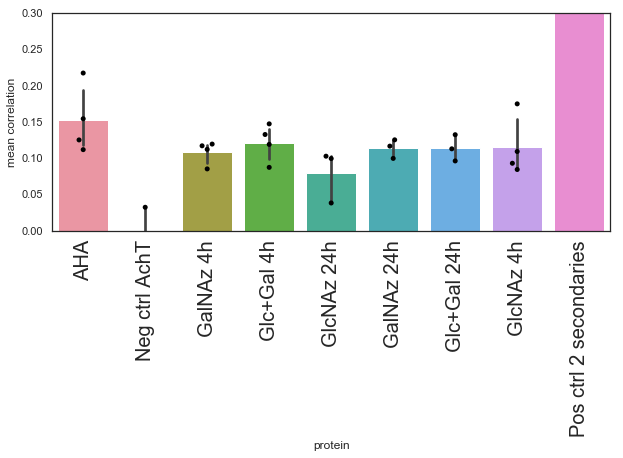

In [210]:
df4h=dfexps[dfexps["protein"].str.contains('blk24')==False]
plt.figure(figsize=(10,4))
sns.barplot(x="protein",y="mean correlation",data=df4h)
sns.swarmplot(x="protein",y="mean correlation",data=df4h,color='black')
plt.ylim([0,0.3])
plt.xticks(rotation=90,size=20)

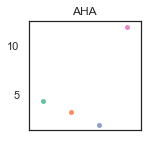

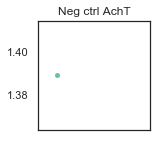

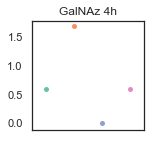

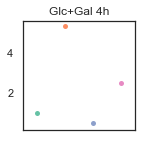

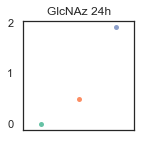

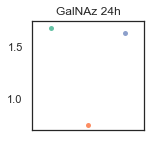

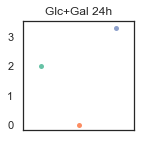

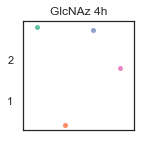

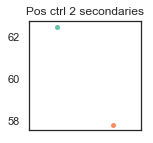

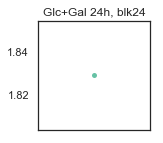

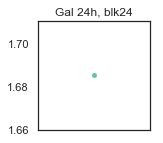

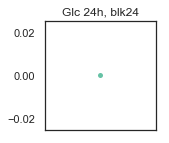

In [208]:
results_allprot={"Protein":[],"expnumber":[],"perc_over":[]}
for protein in dfnew2["Protein"].unique():
    dfprot=dfnew2[dfnew2["Protein"]==protein]
    dfprot=dfprot.reset_index()
    percentages=[]
    expi=[]
    count=1
    for exp in dfprot["exp name"].unique():
        dfexp=dfprot[dfprot["exp name"]==exp]
        a=np.sum(dfexp["correlation"].values[0]>0.7)/len(dfexp["correlation"].values[0])*100
        percentages.append(a)
        expi.append(exp)
        results_allprot["Protein"].append(protein)
        results_allprot["expnumber"].append(count)
        results_allprot["perc_over"].append(a)
        count+=1
    plt.figure(figsize=(2,2))
    g=sns.swarmplot(x=expi,y=percentages)
    plt.title(protein)
    plt.xticks(g.get_xticks(),'')
    

In [198]:
df_all=pd.DataFrame(results_allprot)

In [211]:
df_all.to_csv("/Volumes/Macintosh HD/Users/taldankovich/Downloads/allvals.csv'",sep=';')

In [82]:
dirtowalk='/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Culture_ClickChemistry/20190502_funcatdbco_TNR/sted_withgreenchannel_analyse'

import os
import fnmatch
 
# Get a list of all files in directory
for rootDir, subdirs, filenames in os.walk(dirtowalk):
    # Find the files that matches the given patterm
    for filename in fnmatch.filter(filenames, '*Pop*'):
        try:
            os.remove(os.path.join(rootDir, filename))
        except OSError:
            print("Error while deleting file")
            
for rootDir, subdirs, filenames in os.walk(dirtowalk):
    # Find the files that matches the given patterm
    for filename in fnmatch.filter(filenames, '*rest*txt'):
        try:
            os.remove(os.path.join(rootDir, filename))
        except OSError:
            print("Error while deleting file")
for rootDir, subdirs, filenames in os.walk(dirtowalk):
    # Find the files that matches the given patterm
    for filename in fnmatch.filter(filenames, '*_all*'):
        try:
            os.remove(os.path.join(rootDir, filename))
        except OSError:
            print("Error while deleting file")

## Read ripleys of spots from silvio script

In [83]:
dirtoread='/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Culture_ClickChemistry/'

In [84]:
results = {"foldername":[],
          "expname":[],
          "average_tenascin_linescan":[],
          "average_farred_linescan":[]}
           
path = os.path.dirname(expdir)  
outputFolder = os.path.dirname(expdir + "/new/")
filelist = []
for root, _, filenames in os.walk(path):
     for filename in filenames:
         filelist.append(os.path.join(root, filename))      
for i in range(0,len(filelist)):
    if "scan.txt" in str(filelist[i]):
        name='/'.join(filelist[i].split('/')[:-1])
        results["foldername"].append(name)
        results["expname"].append(filelist[i].split('/')[-4])
        #read linescan from text file
        scanname=name+'/tenascin_scan.txt'
        results["average_tenascin_linescan"].append(np.loadtxt(scanname))
        scanname=name+'/test_protein_scan.txt'
        results["average_farred_linescan"].append(np.loadtxt(scanname))

In [85]:
df_average_ripleys=pd.DataFrame(results)

In [93]:
df_average_ripleys['Protein']='None'

df_average_ripleys.loc[df_average_ripleys['foldername'].str.contains('glc4hrs'), 'Protein'] = 'GlcNAz 4h'
df_average_ripleys.loc[df_average_ripleys['foldername'].str.contains('gal4hrs'), 'Protein'] = 'GalNAz 4h'
df_average_ripleys.loc[df_average_ripleys['foldername'].str.contains('glc24hrs'), 'Protein'] = 'GlcNAz 24h'
df_average_ripleys.loc[df_average_ripleys['foldername'].str.contains('gal24hrs'), 'Protein'] = 'GalNAz 24h'
df_average_ripleys.loc[df_average_ripleys['foldername'].str.contains('glcgal24hrs'), 'Protein'] = 'Glc+Gal 24h'
df_average_ripleys.loc[df_average_ripleys['foldername'].str.contains('glc24hrs_blk24hr'), 'Protein'] = 'Glc 24h, blk24'
df_average_ripleys.loc[df_average_ripleys['foldername'].str.contains('gal24hrs_blk24hr'), 'Protein'] = 'Gal 24h, blk24'
df_average_ripleys.loc[df_average_ripleys['foldername'].str.contains('glcgal24hrs_blk24hr'), 'Protein'] = 'Glc+Gal 24h, blk24'
df_average_ripleys.loc[df_average_ripleys['foldername'].str.contains('glcgal4hrs'), 'Protein'] = 'Glc+Gal 4h'
df_average_ripleys.loc[df_average_ripleys['foldername'].str.contains('glcgal4hrs'), 'Protein'] = 'Glc+Gal 4h'
df_average_ripleys.loc[(df_average_ripleys['foldername'].str.contains('0502'))&(df_average_ripleys['foldername'].str.contains('blocked')), 'Protein'] = 'AHA'
df_average_ripleys.loc[(df_average_ripleys['foldername'].str.contains('0522'))&(df_average_ripleys['foldername'].str.contains('acth')), 'Protein'] = 'Neg ctrl AchT'
df_average_ripleys.loc[(df_average_ripleys['foldername'].str.contains('0522'))&(df_average_ripleys['foldername'].str.contains('635')), 'Protein'] = 'Pos ctrl nb635'
df_average_ripleys.loc[(df_average_ripleys['foldername'].str.contains('0522'))&(df_average_ripleys['foldername'].str.contains('_analyse/funcat')), 'Protein'] = 'AHA'
df_average_ripleys.loc[(df_average_ripleys['foldername'].str.contains('0605'))&(df_average_ripleys['foldername'].str.contains('withgreenchannel/funcat')), 'Protein'] = 'AHA'
df_average_ripleys.loc[(df_average_ripleys['foldername'].str.contains('0605'))&(df_average_ripleys['foldername'].str.contains('635')), 'Protein'] = 'Pos ctrl nb635'
df_average_ripleys.loc[(df_average_ripleys['foldername'].str.contains('0605'))&(df_average_ripleys['foldername'].str.contains('acht')), 'Protein'] = 'Neg ctrl AchT'
df_average_ripleys.loc[(df_average_ripleys['foldername'].str.contains('0612'))&(df_average_ripleys['foldername'].str.contains('acht')), 'Protein'] = 'Neg ctrl AchT'
df_average_ripleys.loc[(df_average_ripleys['foldername'].str.contains('0612'))&(df_average_ripleys['foldername'].str.contains('635')), 'Protein'] = 'Pos ctrl nb635'
df_average_ripleys.loc[(df_average_ripleys['foldername'].str.contains('0612'))&(df_average_ripleys['foldername'].str.contains('aha')), 'Protein'] = 'AHA'
df_average_ripleys.loc[(df_average_ripleys['foldername'].str.contains('0612'))&(df_average_ripleys['foldername'].str.contains('aha')), 'Protein'] = 'AHA'
df_average_ripleys.loc[(df_average_ripleys['foldername'].str.contains('aha')), 'Protein'] = 'AHA'
df_average_ripleys.loc[(df_average_ripleys['foldername'].str.contains('vacht')), 'Protein'] = 'Neg ctrl AchT'
df_average_ripleys.loc[(df_average_ripleys['foldername'].str.contains('positive')), 'Protein'] = 'Pos control'





In [94]:
df_average_ripleys[df_average_ripleys["Protein"]=="None"]["foldername"].values

array([], dtype=object)

<Figure size 1440x1440 with 0 Axes>

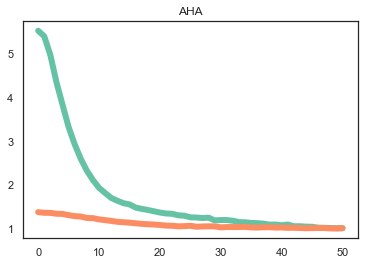

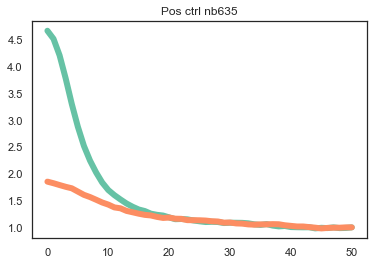

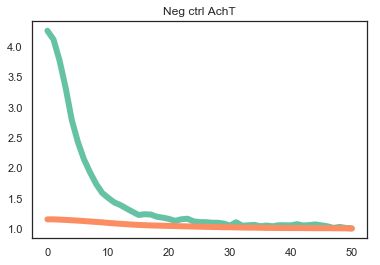

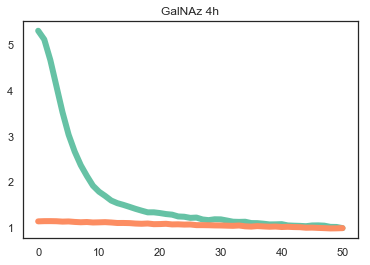

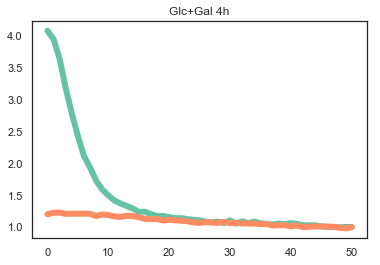

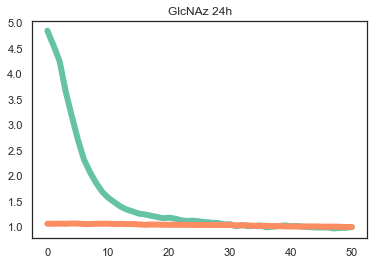

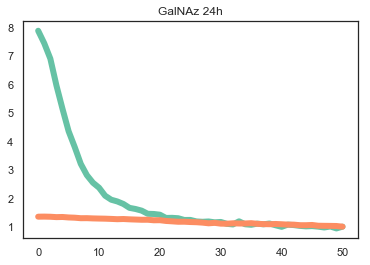

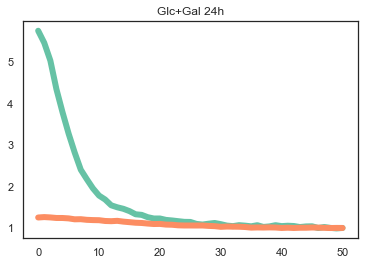

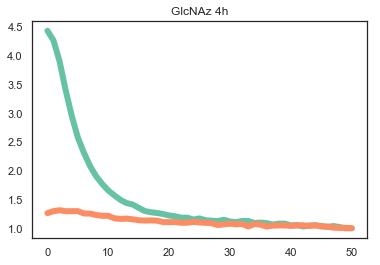

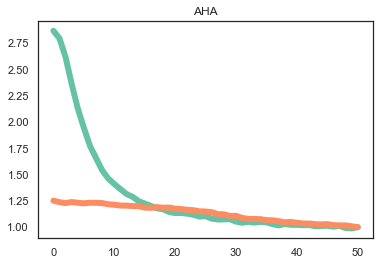

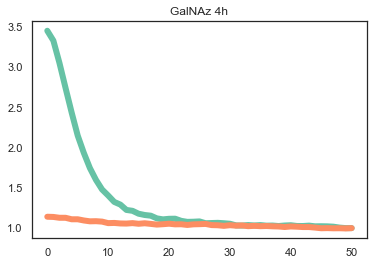

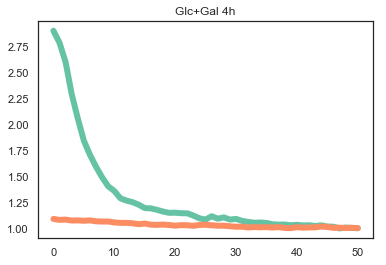

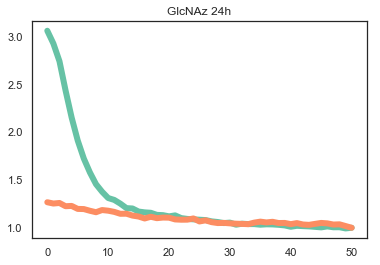

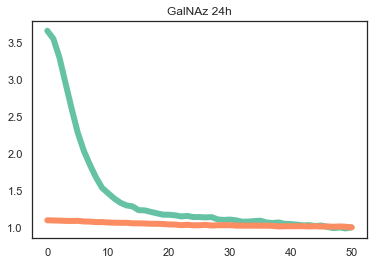

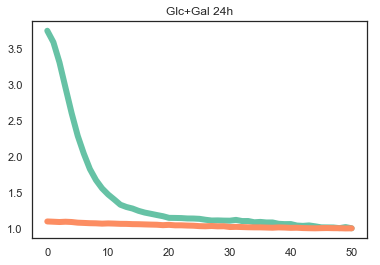

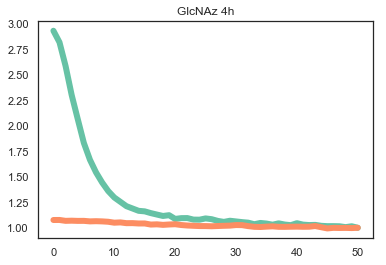

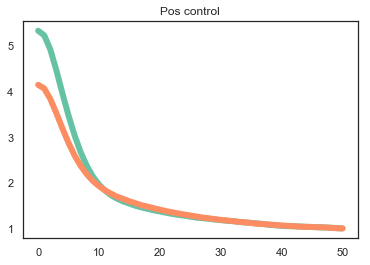

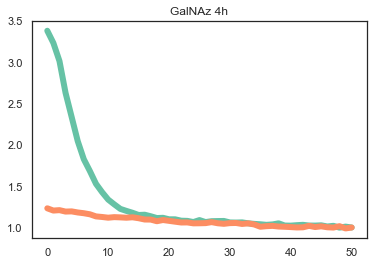

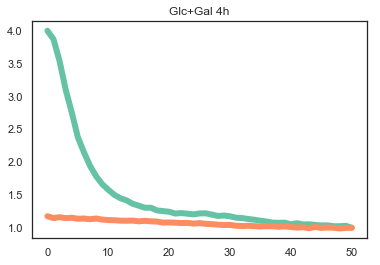

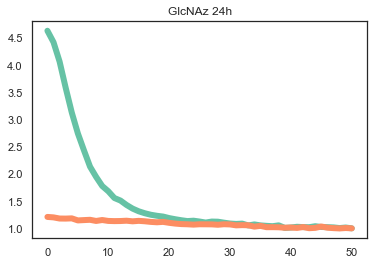

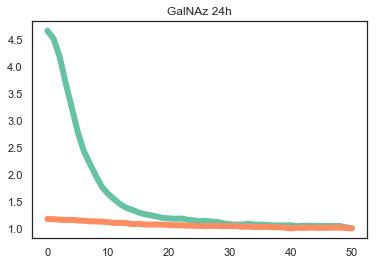

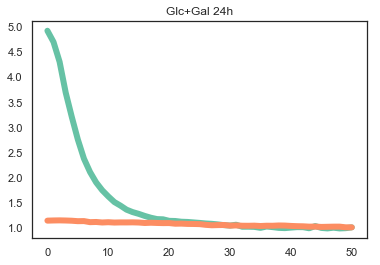

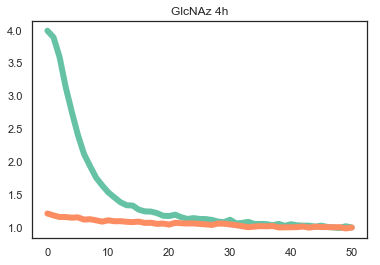

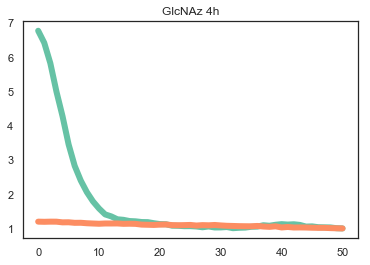

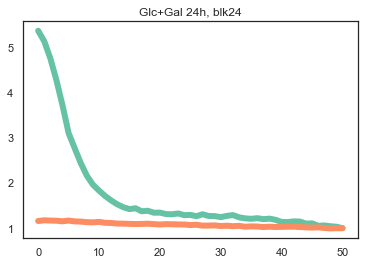

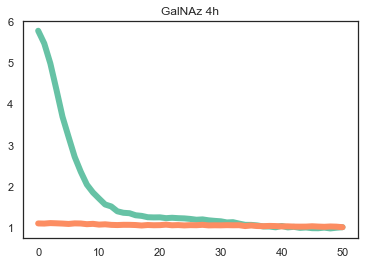

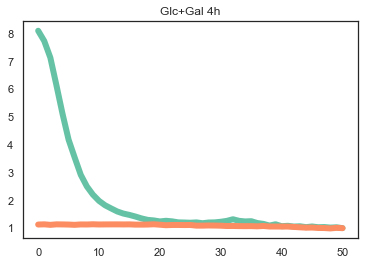

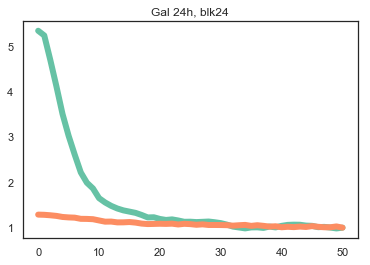

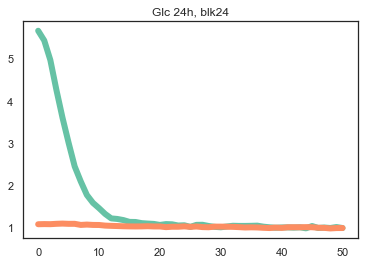

In [213]:
plt.figure(figsize=(20,20))
for exp in df_average_ripleys["expname"].unique():
    dfexp=df_average_ripleys[df_average_ripleys["expname"]==exp]
    dfexp=dfexp.reset_index()
    for protein in dfexp["Protein"].unique():
        dfprot=dfexp[dfexp["Protein"]==protein]

        fig=plt.figure()

        plt.title(protein)
        plt.plot(np.arange(0,len(dfprot["average_tenascin_linescan"].values.mean())),
             dfprot["average_tenascin_linescan"].values.mean(),linewidth=6
            )
        plt.plot(np.arange(0,len(dfprot["average_tenascin_linescan"].values.mean())),
             dfprot["average_farred_linescan"].values.mean(),linewidth=6
            )

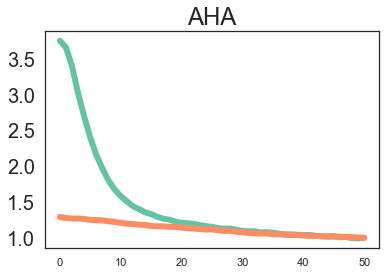

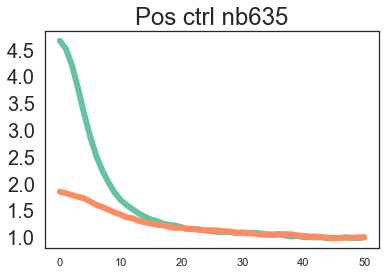

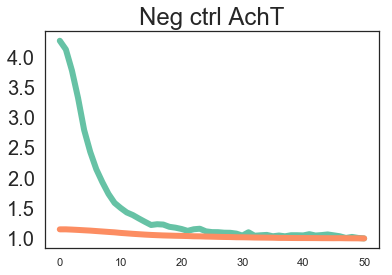

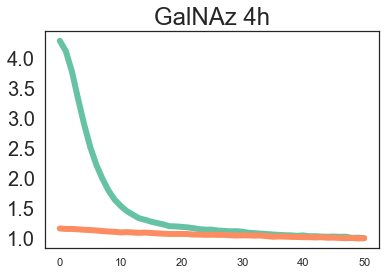

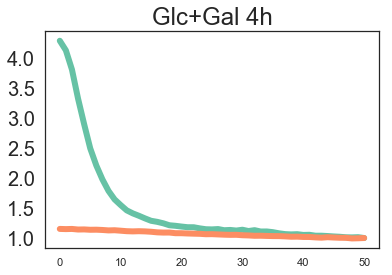

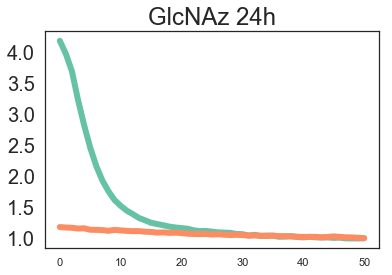

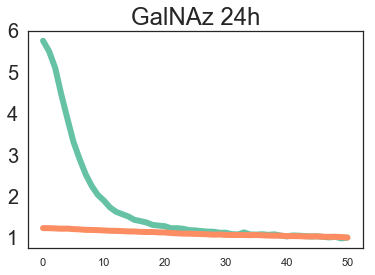

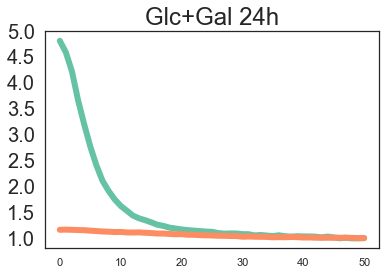

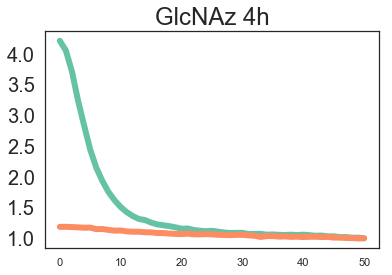

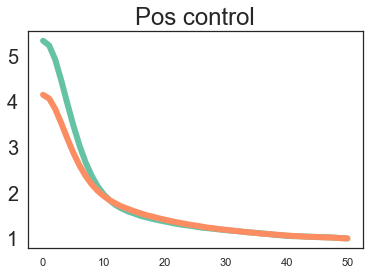

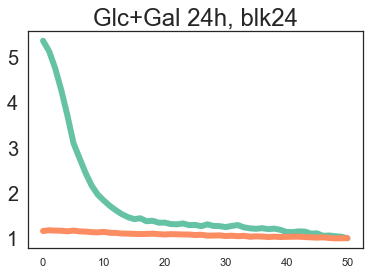

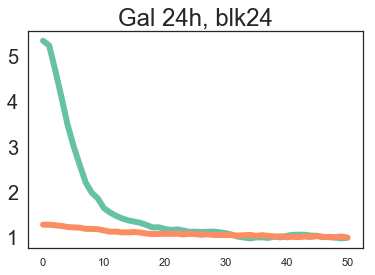

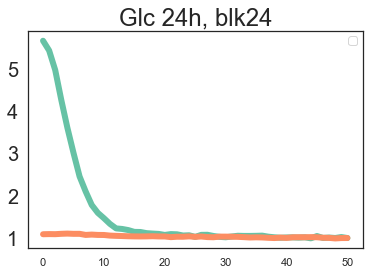

In [218]:
for protein in df_average_ripleys["Protein"].unique():
    dfprot=df_average_ripleys[df_average_ripleys["Protein"]==protein]

    fig=plt.figure()

    plt.title(protein,size=24)
    plt.plot(np.arange(0,len(dfprot["average_tenascin_linescan"].values.mean())),
         dfprot["average_tenascin_linescan"].values.mean(),linewidth=6
        )
    plt.plot(np.arange(0,len(dfprot["average_tenascin_linescan"].values.mean())),
         dfprot["average_farred_linescan"].values.mean(),linewidth=6
        )
    plt.yticks(size=20)
plt.legend()

In [105]:
for exp in df_average_ripleys["expname"].unique():
    dfexp=df_average_ripleys[df_average_ripleys["expname"]==exp]
    dfexp=dfexp.reset_index()
    for protein in dfexp["Protein"].unique():
        dfprot=dfexp[dfexp["Protein"]==protein]
        otherprot=dfprot["average_farred_linescan"].values.mean()[0]
        tenascin=dfprot["average_tenascin_linescan"].values.mean()[0]
        print(protein+': ' + str(tenascin-otherprot))

AHA: 4.1685
Pos ctrl nb635: 2.8157000000000005
Neg ctrl AchT: 3.1151999999999997
GalNAz 4h: 4.146599999999999
Glc+Gal 4h: 2.8696
GlcNAz 24h: 3.77895
GalNAz 24h: 6.537999999999999
Glc+Gal 24h: 4.4959
GlcNAz 4h: 3.1734000000000004
AHA: 1.6160999999999999
GalNAz 4h: 2.3072500000000002
Glc+Gal 4h: 1.81045
GlcNAz 24h: 1.7919499999999997
GalNAz 24h: 2.5663
Glc+Gal 24h: 2.6499499999999996
GlcNAz 4h: 1.8586
Pos control: 1.1852333333333327
GalNAz 4h: 2.1489499999999997
Glc+Gal 4h: 2.81995
GlcNAz 24h: 3.4259499999999994
GalNAz 24h: 3.4894
Glc+Gal 24h: 3.79255
GlcNAz 4h: 2.7793500000000004
GlcNAz 4h: 5.5758
Glc+Gal 24h, blk24: 4.21
GalNAz 4h: 4.6984
Glc+Gal 4h: 6.9643
Gal 24h, blk24: 4.0549
Glc 24h, blk24: 4.5809
